<a href="https://colab.research.google.com/github/smileSD/PCA/blob/main/PCA_with_Decision_tree_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd  
from sklearn.decomposition import PCA 
  
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
from sklearn import datasets

**MNIST dataset to find the correct label of each image**

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [ ]:
data1=pd.DataFrame(digits.data)

In [ ]:
data1.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
data1.describe()

In [ ]:
digits.data.shape

(1797, 64)

In [ ]:
digits.images.shape

In [ ]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
digits.images[0].shape

(8, 8)

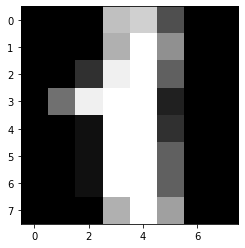

In [ ]:
plt.imshow(digits.images[1], cmap=plt.cm.gray)

In [ ]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

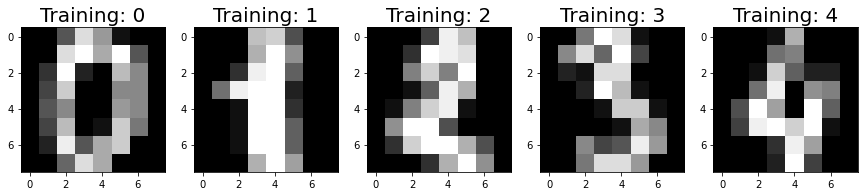

In [ ]:
#Displaying some of the images and labels
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title(f"Training: {label}", fontsize=20 )  

In [ ]:
x=digits.data #independent data-- all 64 features
y=digits.target #dependnet data-- all the  labels on the images

In [ ]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
x.shape

(1797, 64)

In [ ]:
y.shape

(1797,)

In [ ]:
data1.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
# Data Normalization
X_std = StandardScaler().fit_transform(x)

In [ ]:
X_std

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [ ]:
X_std.shape

(1797, 64)

In [ ]:
x1=X_std.T
x1

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.33501649, -0.33501649, -0.33501649, ..., -0.33501649,
        -0.33501649, -0.33501649],
       [-0.04308102, -1.09493684, -1.09493684, ..., -0.88456568,
        -0.67419451,  1.00877481],
       ...,
       [-1.14664746,  0.54856067,  1.56568555, ..., -0.12952258,
         0.8876023 ,  0.8876023 ],
       [-0.5056698 , -0.5056698 ,  1.6951369 , ..., -0.5056698 ,
        -0.5056698 , -0.26113572],
       [-0.19600752, -0.19600752, -0.19600752, ..., -0.19600752,
        -0.19600752, -0.19600752]])

In [ ]:
x1.shape

(64, 1797)

In [ ]:
cov_mat = np.cov(X_std.T)

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [ ]:
eig_vals

array([7.34477606, 5.83549054, 5.15396118, 3.96623597, 2.9663452 ,
       2.57204442, 2.40600941, 2.06867355, 1.82993314, 1.78951739,
       1.69784616, 1.57287889, 1.38870781, 1.35933609, 1.32152536,
       1.16829176, 1.08368678, 0.99977862, 0.97438293, 0.90891242,
       0.82271926, 0.77631014, 0.71155675, 0.64552365, 0.59527399,
       0.5765018 , 0.52673155, 0.5106363 , 0.48686381, 0.45560107,
       0.44285155, 0.42230086, 0.3991063 , 0.39110111, 0.36094517,
       0.34860306, 0.3195963 , 0.29406627, 0.05037444, 0.27692285,
       0.06328961, 0.258273  , 0.24783029, 0.2423566 , 0.07635394,
       0.08246812, 0.09018543, 0.09840876, 0.10250434, 0.11188655,
       0.11932898, 0.12426371, 0.13321081, 0.14311427, 0.217582  ,
       0.15818474, 0.16875236, 0.20799593, 0.17612894, 0.2000909 ,
       0.18983516, 0.        , 0.        , 0.        ])

In [ ]:
# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] 
var_exp

[12.033916097734895,
 9.561054403097872,
 8.444414892624566,
 6.498407907524164,
 4.860154875966409,
 4.214119869271949,
 3.9420828035673705,
 3.3893809246383264,
 2.998221011625231,
 2.932002551252215,
 2.781805463550328,
 2.5770550925820093,
 2.275303315764257,
 2.227179739514352,
 2.1652294318492404,
 1.9141666064421259,
 1.7755470851681905,
 1.6380692742844218,
 1.5964601688623399,
 1.4891911870878232,
 1.347969565817934,
 1.2719313702347488,
 1.1658373505919426,
 1.057646598536317,
 0.9753159471981102,
 0.9445589897319995,
 0.863013826970724,
 0.8366428536685141,
 0.7976932484112367,
 0.7464713709260616,
 0.7255821513702765,
 0.6919112454811804,
 0.653908535572616,
 0.6407925738459836,
 0.5913841117223417,
 0.5711624052235237,
 0.5236368034166363,
 0.4818075864451421,
 0.45371925985844846,
 0.42316275323277824,
 0.406053069979037,
 0.39708480827582654,
 0.35649330314261685,
 0.34078718147029946,
 0.3278353352879543,
 0.3110320073453566,
 0.2885752941089339,
 0.27648926352354514,
 

In [ ]:
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance
cum_var_exp

array([ 12.0339161 ,  21.5949705 ,  30.03938539,  36.5377933 ,
        41.39794818,  45.61206805,  49.55415085,  52.94353177,
        55.94175279,  58.87375534,  61.6555608 ,  64.23261589,
        66.50791921,  68.73509895,  70.90032838,  72.81449499,
        74.59004207,  76.22811135,  77.82457152,  79.3137627 ,
        80.66173227,  81.93366364,  83.09950099,  84.15714759,
        85.13246353,  86.07702252,  86.94003635,  87.77667921,
        88.57437245,  89.32084382,  90.04642598,  90.73833722,
        91.39224576,  92.03303833,  92.62442244,  93.19558485,
        93.71922165,  94.20102924,  94.6547485 ,  95.07791125,
        95.48396432,  95.88104913,  96.23754243,  96.57832961,
        96.90616495,  97.21719696,  97.50577225,  97.78226151,
        98.04143645,  98.27591946,  98.49417632,  98.69777395,
        98.89328638,  99.07660488,  99.24455127,  99.40578733,
        99.55355002,  99.68866843,  99.81376918,  99.91746491,
       100.        , 100.        , 100.        , 100.  

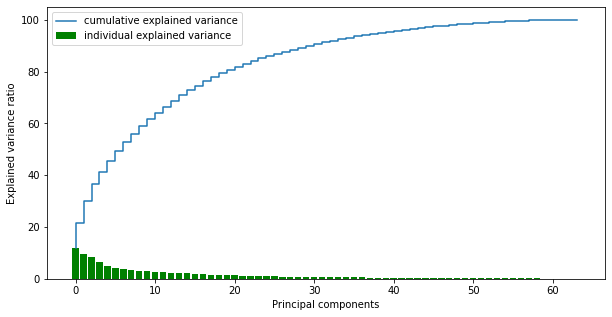

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp,label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend()
plt.show()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_std,y, train_size=0.8)

In [ ]:
x_test.shape

(360, 64)

In [ ]:
x_train.shape

(1437, 64)

In [ ]:
pca = PCA(n_components=20)
pca_x_train = pca.fit_transform(x_train)
pca_x_test = pca.transform(x_test)

In [ ]:
pca_x_train.shape

(1437, 20)

In [ ]:
pca_x_test.shape

(360, 20)

In [ ]:
rf=DecisionTreeClassifier().fit(pca_x_train,y_train)

In [ ]:
predicted=rf.predict(pca_x_test)

In [ ]:
predicted

array([6, 0, 8, 8, 8, 4, 9, 3, 3, 9, 7, 6, 2, 2, 5, 2, 8, 1, 7, 5, 4, 8,
       6, 5, 1, 1, 3, 9, 8, 0, 7, 8, 6, 1, 1, 6, 8, 4, 6, 1, 1, 4, 8, 6,
       2, 4, 6, 3, 8, 4, 7, 6, 2, 5, 9, 9, 2, 8, 7, 6, 1, 1, 9, 0, 7, 7,
       9, 0, 2, 3, 1, 2, 9, 6, 5, 0, 8, 8, 9, 5, 9, 3, 1, 8, 5, 4, 3, 3,
       5, 0, 4, 2, 7, 4, 2, 4, 6, 5, 6, 5, 6, 2, 3, 6, 7, 3, 7, 1, 9, 5,
       8, 0, 4, 2, 7, 0, 6, 8, 1, 1, 6, 6, 8, 4, 5, 6, 2, 9, 3, 7, 5, 7,
       5, 1, 5, 9, 9, 7, 4, 1, 9, 0, 0, 5, 7, 9, 3, 7, 8, 1, 0, 4, 3, 6,
       5, 2, 8, 6, 5, 5, 3, 1, 4, 9, 0, 1, 1, 4, 4, 4, 1, 7, 1, 2, 7, 1,
       9, 5, 7, 9, 9, 9, 5, 5, 2, 2, 4, 4, 5, 0, 2, 5, 7, 4, 6, 7, 2, 2,
       7, 2, 7, 5, 0, 3, 3, 3, 8, 9, 6, 9, 6, 1, 0, 3, 6, 3, 6, 0, 5, 7,
       9, 5, 1, 1, 2, 1, 6, 2, 1, 0, 8, 4, 1, 7, 7, 9, 9, 5, 5, 2, 4, 4,
       9, 5, 8, 2, 3, 1, 6, 5, 0, 9, 7, 6, 1, 7, 7, 6, 7, 3, 4, 8, 5, 8,
       8, 8, 8, 4, 3, 6, 9, 0, 8, 3, 0, 8, 2, 4, 9, 9, 7, 7, 1, 4, 3, 6,
       0, 1, 9, 5, 9, 1, 8, 8, 2, 4, 2, 3, 8, 5, 0,

In [ ]:
y_test.shape

(360,)

In [ ]:
accuracy_score(predicted,y_test)

0.8416666666666667

In [ ]:
confusion_matrix(predicted, y_test)

array([[26,  0,  0,  0,  0,  1,  1,  0,  0,  1],
       [ 1, 34,  0,  0,  0,  0,  0,  0,  3,  1],
       [ 0,  0, 31,  0,  0,  1,  0,  1,  2,  1],
       [ 0,  0,  0, 24,  0,  1,  0,  0,  4,  4],
       [ 0,  0,  1,  0, 28,  0,  1,  0,  1,  1],
       [ 1,  0,  0,  1,  1, 31,  0,  1,  2,  2],
       [ 1,  0,  0,  0,  0,  0, 34,  1,  0,  0],
       [ 0,  0,  1,  0,  2,  0,  0, 35,  0,  0],
       [ 0,  0,  2,  1,  0,  2,  1,  0, 29,  3],
       [ 1,  1,  1,  0,  1,  2,  0,  1,  2, 31]], dtype=int64)

In [ ]:
digits.data

In [ ]:
digits.target[0:5]

In [ ]:
for i,a in enumerate([2,3,4,54]):
    print(i,a)

0 2
1 3
2 4
3 54


In [ ]:
predicted

array([6, 0, 8, 8, 8, 4, 9, 3, 3, 9, 7, 6, 2, 2, 5, 2, 8, 1, 7, 5, 4, 8,
       6, 5, 1, 1, 3, 9, 8, 0, 7, 8, 6, 1, 1, 6, 8, 4, 6, 1, 1, 4, 8, 6,
       2, 4, 6, 3, 8, 4, 7, 6, 2, 5, 9, 9, 2, 8, 7, 6, 1, 1, 9, 0, 7, 7,
       9, 0, 2, 3, 1, 2, 9, 6, 5, 0, 8, 8, 9, 5, 9, 3, 1, 8, 5, 4, 3, 3,
       5, 0, 4, 2, 7, 4, 2, 4, 6, 5, 6, 5, 6, 2, 3, 6, 7, 3, 7, 1, 9, 5,
       8, 0, 4, 2, 7, 0, 6, 8, 1, 1, 6, 6, 8, 4, 5, 6, 2, 9, 3, 7, 5, 7,
       5, 1, 5, 9, 9, 7, 4, 1, 9, 0, 0, 5, 7, 9, 3, 7, 8, 1, 0, 4, 3, 6,
       5, 2, 8, 6, 5, 5, 3, 1, 4, 9, 0, 1, 1, 4, 4, 4, 1, 7, 1, 2, 7, 1,
       9, 5, 7, 9, 9, 9, 5, 5, 2, 2, 4, 4, 5, 0, 2, 5, 7, 4, 6, 7, 2, 2,
       7, 2, 7, 5, 0, 3, 3, 3, 8, 9, 6, 9, 6, 1, 0, 3, 6, 3, 6, 0, 5, 7,
       9, 5, 1, 1, 2, 1, 6, 2, 1, 0, 8, 4, 1, 7, 7, 9, 9, 5, 5, 2, 4, 4,
       9, 5, 8, 2, 3, 1, 6, 5, 0, 9, 7, 6, 1, 7, 7, 6, 7, 3, 4, 8, 5, 8,
       8, 8, 8, 4, 3, 6, 9, 0, 8, 3, 0, 8, 2, 4, 9, 9, 7, 7, 1, 4, 3, 6,
       0, 1, 9, 5, 9, 1, 8, 8, 2, 4, 2, 3, 8, 5, 0,

In [ ]:
y_test

array([6, 0, 8, 8, 8, 4, 9, 3, 3, 9, 7, 6, 2, 2, 4, 8, 8, 1, 7, 5, 4, 8,
       6, 5, 1, 8, 3, 9, 8, 0, 7, 8, 6, 1, 1, 6, 2, 4, 6, 1, 1, 4, 8, 6,
       9, 4, 6, 3, 9, 4, 7, 6, 2, 5, 9, 9, 2, 5, 7, 6, 1, 1, 9, 0, 7, 7,
       9, 0, 2, 3, 1, 2, 9, 6, 5, 0, 6, 9, 9, 5, 9, 3, 1, 8, 8, 8, 3, 3,
       5, 0, 4, 5, 7, 4, 8, 4, 6, 5, 6, 9, 6, 2, 3, 6, 7, 3, 7, 1, 9, 5,
       8, 0, 4, 2, 7, 0, 6, 8, 1, 0, 6, 6, 8, 4, 5, 6, 2, 9, 8, 7, 5, 4,
       5, 1, 5, 8, 9, 7, 4, 1, 9, 5, 0, 5, 7, 2, 3, 4, 8, 9, 0, 9, 3, 0,
       5, 2, 8, 6, 0, 5, 9, 1, 4, 9, 0, 1, 1, 4, 4, 4, 8, 7, 1, 2, 7, 1,
       0, 9, 7, 8, 9, 9, 7, 5, 2, 2, 2, 4, 3, 0, 2, 5, 7, 4, 6, 7, 2, 2,
       7, 2, 7, 5, 0, 3, 3, 3, 8, 9, 6, 9, 6, 1, 0, 3, 6, 8, 6, 0, 5, 7,
       9, 5, 1, 1, 2, 1, 6, 2, 1, 0, 8, 4, 8, 7, 7, 9, 9, 8, 5, 7, 4, 4,
       9, 5, 8, 2, 9, 1, 7, 5, 0, 1, 7, 6, 1, 7, 7, 6, 7, 5, 4, 8, 5, 8,
       8, 2, 8, 6, 3, 6, 9, 0, 8, 8, 0, 8, 2, 4, 4, 5, 7, 2, 1, 4, 9, 6,
       6, 1, 9, 5, 9, 1, 9, 8, 2, 4, 2, 3, 8, 5, 0,

In [ ]:
y_test.shape

In [ ]:
def get_misclassified_index(y_pred,y_test):
    misclassification=[]#help us out to get the misclassified index value
    for index,(predicted,actual) in enumerate(zip(y_pred,y_test)):
        if predicted!=actual:
            misclassification.append(index)
            
    return misclassification

In [ ]:
misclassification = get_misclassified_index(predicted,y_test)

In [ ]:
len(misclassification)

57

In [ ]:
pca_x_test[14]

array([ 3.15990259, -0.16790979,  1.9582107 ,  0.27691861,  0.26682162,
       -1.63588323,  2.1832873 ,  0.3615494 , -0.2841437 , -0.34296471,
        1.55494172, -0.87347565, -0.34057782,  0.47544557, -0.12822067,
        1.36709661,  0.09869584, -0.40762052,  0.40121299,  0.06049324])

In [ ]:
predicted[14]

5

In [ ]:
y_test[14]

4

In [ ]:
misclassification[0:5]

[14, 15, 25, 36, 44]

In [ ]:
for the 1st loop, index=0, wrong= 14

In [ ]:
def plot_misclassifications(misclassification):
    plt.figure(figsize=(20,4))
    for index,wrong in enumerate(misclassification[0:5]):
        plt.subplot(1,5,index+1)
        plt.imshow(np.reshape(pca_x_test[wrong],(5,4)),cmap=plt.cm.gray)
        plt.title("Predicted:{} Actual:{}".format(predicted[wrong],y_test[wrong]))

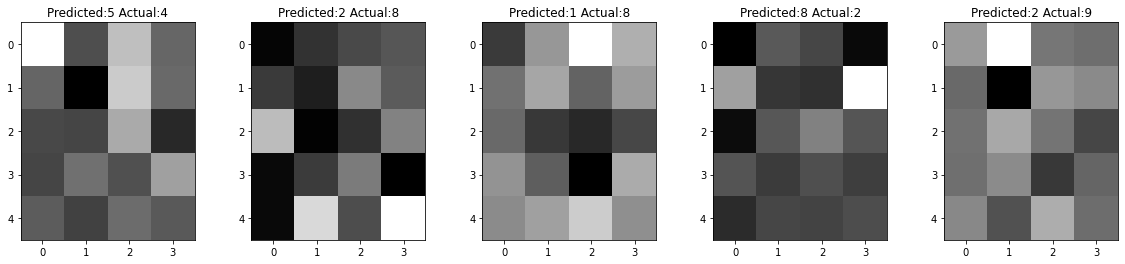

In [ ]:
plot_misclassifications(misclassification)